In [1]:
%pylab inline
import os
import sys
sys.path.insert(0, "..")
import scipy.ndimage
import imcut
from imcut import pycut


Populating the interactive namespace from numpy and matplotlib


# Prepare the image

In [2]:
def make_data(sz=32, offset=0, sigma=80):
    seeds = np.zeros([sz, sz, sz], dtype=np.int8)
    seeds[offset + 12, offset + 9:offset + 14, offset + 10] = 1
    seeds[offset + 20, offset + 18:offset + 21, offset + 12] = 1
    img = np.ones([sz, sz, sz])
    img = img - seeds

    seeds[
        offset + 3:offset + 15, 
        offset + 2:offset + 6, 
        offset + 27:offset + 29] = 2
    img = scipy.ndimage.morphology.distance_transform_edt(img)
    segm = img < 7
    img = (100 * segm + sigma * np.random.random(img.shape)).astype(np.uint8)
    return img, segm, seeds

# Use different model for foreground and background

fit[KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='tophat', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)]
shpa clx (8, 1)
fit[GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)]
shpa clx (96, 1)
shape(262144,)
shape(262144,)
return_only_object_with_seeds
shape(262144,)
shape(262144,)
shape(400,)
shape(400,)


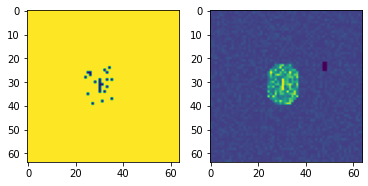

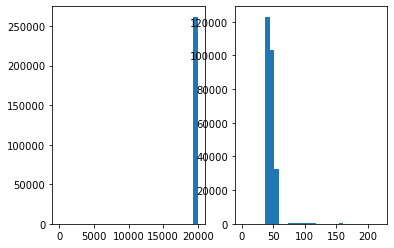

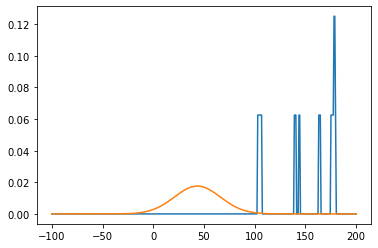

In [6]:
import sklearn.mixture
# import sklearn
from sklearn import neighbors, mixture

img, seg, seeds = make_data(64, 20)


segparams = {
    'method': 'graphcut',
    'modelparams': {
        'type': 'custom',
#         'params': {},
    }
}
gc = pycut.ImageGraphCut(img , segparams=segparams)

# rewrite the default setting by you own model
from sklearn.neighbors import KernelDensity

# object with .fit() and .score_samples() functions

gc.mdl.mdl[1] = KernelDensity(kernel='tophat')
# gc.mdl.mdl[2] = KernelDensity(kernel='gaussian') 
gc.mdl.mdl[2] = sklearn.mixture.GaussianMixture(n_components=1)


gc.set_seeds(seeds)
gc.run()

f = gc.debug_show_reconstructed_similarity(show=False, bins=30)
f = gc.debug_show_model(start=-100, stop=200, show=False)